In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt

# Exercise 2: k-NN Regression

In [2]:
df = pd.read_csv("polynomial200.csv", header=None, names=['X', 'y'])
df.shape

(200, 2)

In [3]:
df.head(10)

,X,y
0,17.685688,39.256887
1,4.914959,45.928932
2,24.130699,66.028321
3,16.882741,41.821073
4,6.652384,36.711766
5,6.124465,46.876217
6,24.514960,67.600803
7,18.574068,48.135178
8,12.322162,51.306996
9,16.675893,32.418323


## Divide the dataset into a training set of size 100, and test set of size 100.

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(df['X'], df['y'], test_size=0.5, random_state=0)

## Plot the training and test set side-by-side in a 1 × 2 pattern.

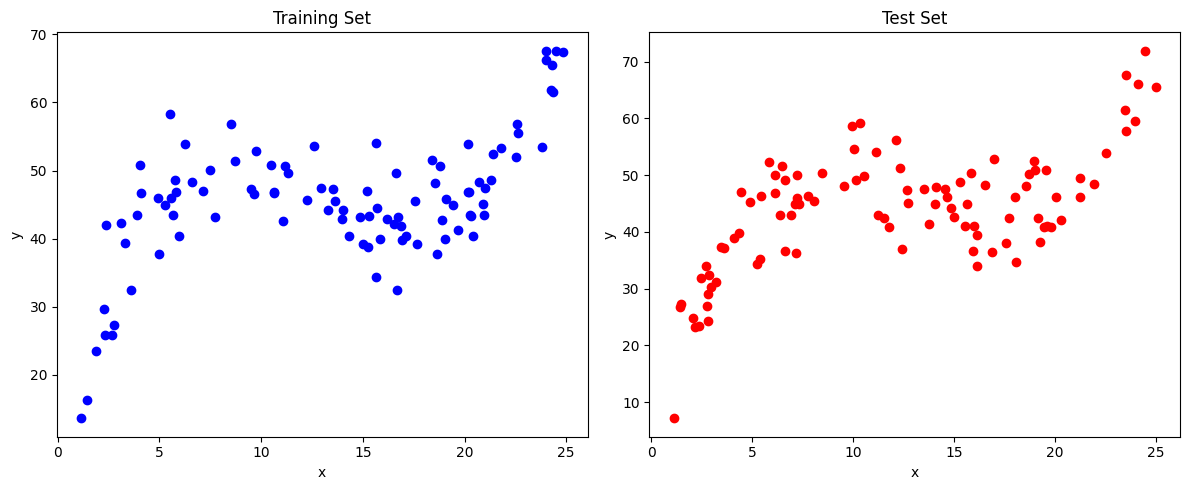

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].scatter(xTrain, yTrain, color='blue', label='Training data')
axes[0].set_title('Training Set')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')


axes[1].scatter(xTest, yTest, color='red', label='Test data')
axes[1].set_title('Test Set')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

plt.tight_layout()
plt.show()

In [10]:
def knnRegression(xTrain, yTrain, xTest, k):
    
    sortedIndices = np.argsort(xTrain)
    sortedxTrain = xTrain[sortedIndices]
    sortedyTrain = yTrain[sortedIndices]

    predictions = []
    for x in xTest:

        idx = np.searchsorted(sortedxTrain, x)
        start = max(0, idx - (k // 2))
        end = min(len(xTrain), start + k)
        start = max(0, end - k)  
        nearestNeighbors = sortedyTrain[start:end]


        prediction = np.mean(nearestNeighbors)
        predictions.append(prediction)

    return np.array(predictions)

## Display a 2 × 3 plot showing the k-NN regression result and the MSE training error for k = 1, 3, 5, 7, 9, 11.

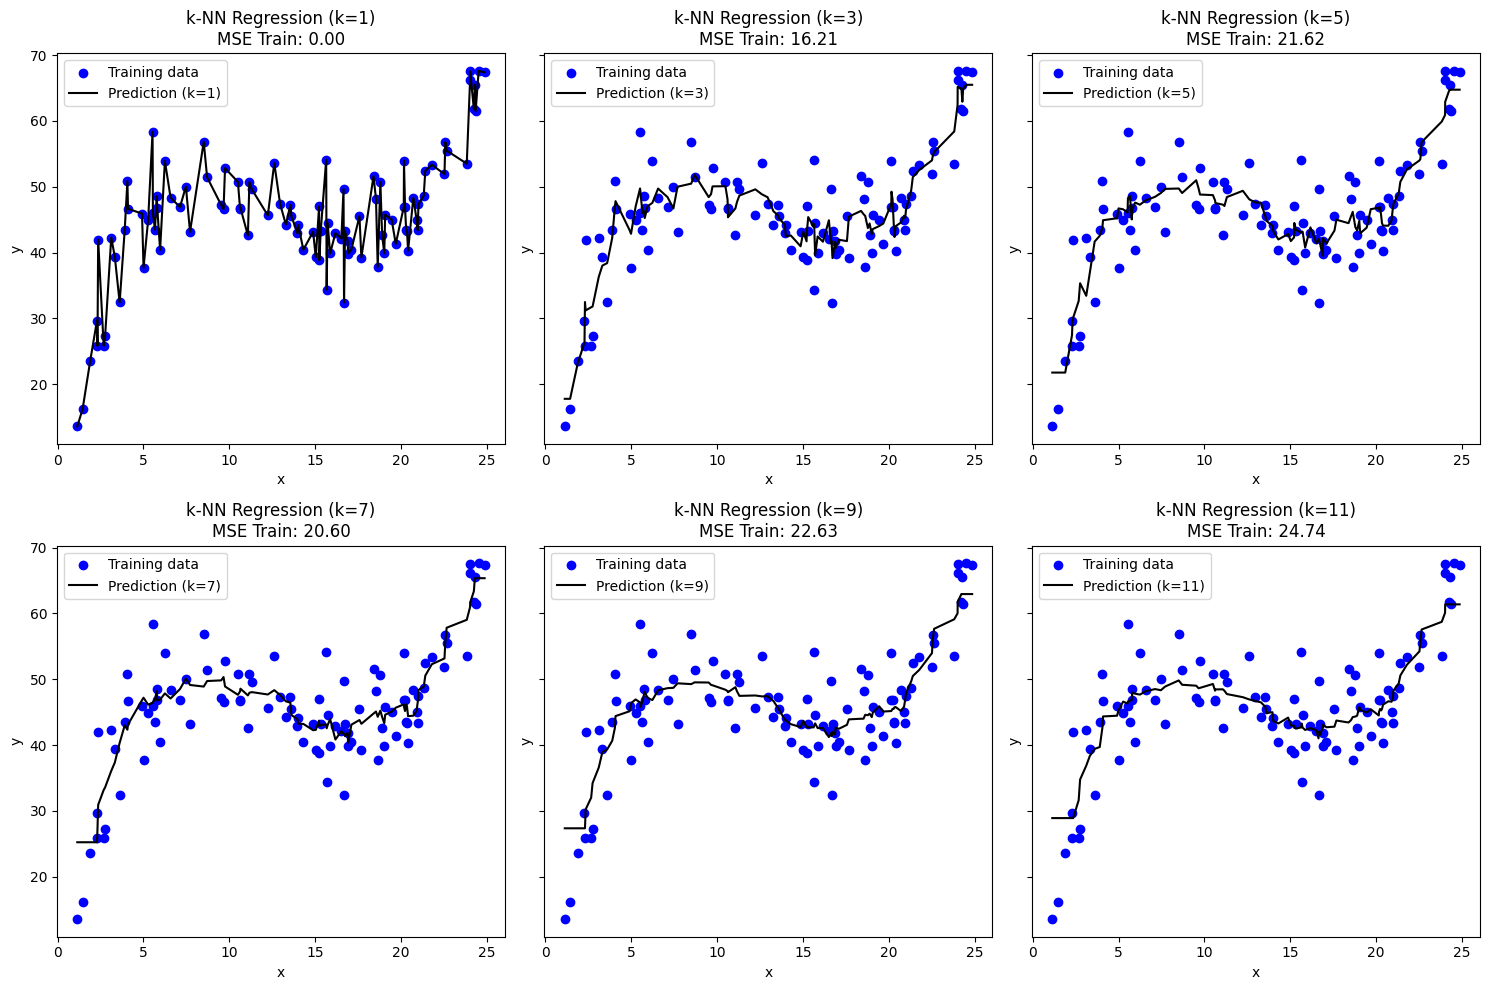

In [11]:

xTrain = xTrain.reset_index(drop=True)
yTrain = yTrain.reset_index(drop=True)
xTest = xTest.reset_index(drop=True)
yTest = yTest.reset_index(drop=True)


xTrainNp = xTrain.to_numpy()
yTrainNp = yTrain.to_numpy()
xTestNp = xTest.to_numpy()
yTestNp = yTest.to_numpy()

kValues = [1, 3, 5, 7, 9, 11]
mseTrain = []
mseTest = []


fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.ravel()

for i, k in enumerate(kValues):
    
    yTrainPred = knnRegression(xTrainNp, yTrainNp, xTrainNp, k)
    mseTrainError = mean_squared_error(yTrainNp, yTrainPred)
    mseTrain.append(mseTrainError)

    yTestPred = knnRegression(xTrainNp, yTrainNp, xTestNp, k)
    mseTestError = mean_squared_error(yTestNp, yTestPred)
    mseTest.append(mseTestError)


    axes[i].scatter(xTrainNp, yTrainNp, color='blue', label='Training data')
    axes[i].plot(np.sort(xTrainNp), yTrainPred[np.argsort(xTrainNp)], color='black', label='Prediction (k={})'.format(k))
    axes[i].set_title('k-NN Regression (k={})\nMSE Train: {:.2f}'.format(k, mseTrainError))
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.tight_layout()
plt.show()





## Compute and present the MSE test error for k = 1, 3, 5, 7, 9, 11.

In [12]:
mseTest_df = pd.DataFrame({'k': kValues, 'MSE Test Error': mseTest})
mseTest_df

,k,MSE Test Error
0,1,62.398331
1,3,33.433310
2,5,32.534852
3,7,33.359014
4,9,34.508700
5,11,34.257445


## Which k gives the best regression? Motivate your answer!